#00. Input data (from CSV file)

In [0]:
import csv
import numpy as np
import matplotlib.pyplot as plt

#testing data
test_data = []
#testing data의 결과값
test_h = []
#training data
train_data = []
#training data의 결과값
train_h = []

with open('/content/drive/My Drive/AssignmentFolder/Assignment04/data_test.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    for i in reader:
        j = []
        j.append(1.0)
        j.append(float(i[0]))
        j.append(float(i[1]))
        j.append(float(i[2]))
        test_data.append(j)
        test_h.append(float(i[3]))

with open('/content/drive/My Drive/AssignmentFolder/Assignment04/data_train.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    for i in reader:
        j = []
        j.append(1.0)
        j.append(float(i[0]))
        j.append(float(i[1]))
        j.append(float(i[2]))
        train_data.append(j)
        train_h.append(float(i[3]))

#리스트를 변수로 전환
train_data = np.array(train_data)

train_h = np.array(train_h)

test_data = np.array(test_data)

test_h = np.array(test_h)


#01. Plotting $\theta$'s gradient descent
$J(\theta)$ = ${1 \over\ 2m}$$\Sigma$$_{i=1}^{m}$($f$$_\theta$($x^{(i)}$, $y^{(i)}$, $z^{(i)}$)-$h^{(i)}$)$^2$ \\
$\theta$$_0^{(t+1)}$ = $\theta$$_0^{(t)}$$-a{1 \over\ m}$$\Sigma$$_{i=1}^{m}$($f$$_\theta$($x^{(i)}$, $y^{(i)}$, $z^{(i)}$)-$h^{(i)}$) \\
$\theta$$_1^{(t+1)}$ = $\theta$$_1^{(t)}$$-a{1 \over\ m}$$\Sigma$$_{i=1}^{m}$($f$$_\theta$($x^{(i)}$, $y^{(i)}$, $z^{(i)}$)-$h^{(i)}$)$x^{(i)}$ \\
$\theta$$_2^{(t+1)}$ = $\theta$$_2^{(t)}$$-a{1 \over\ m}$$\Sigma$$_{i=1}^{m}$($f$$_\theta$($x^{(i)}$, $y^{(i)}$, $z^{(i)}$)-$h^{(i)}$)$y^{(i)}$ \\
$\theta$$_3^{(t+1)}$ = $\theta$$_3^{(t)}$$-a{1 \over\ m}$$\Sigma$$_{i=1}^{m}$($f$$_\theta$($x^{(i)}$, $y^{(i)}$, $z^{(i)}$)-$h^{(i)}$)$z^{(i)}$ \\


convergence
theta =  [-0.06561563  0.78196003 -1.78705747  4.00592403]
num of loop =  220004
final error =  103.61586783935968


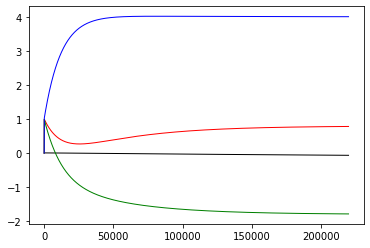

In [22]:
#theta에 관한 리스트들
t0_list = []
t1_list = []
t2_list = []
t3_list = []

#training error
J_tr = []

#testing error
J_ts = []

#Gradient descent의 미분을 위해 값 정해줌
X = np.transpose(train_data)[1]
Y = np.transpose(train_data)[2]
Z = np.transpose(train_data)[3]

#theta
t0 = 0.0
t1 = 0.0
t2 = 0.0
t3 = 0.0
theta = np.array([t0, t1, t2, t3])

i = 0
#step size
a = 0.000001

#Threshold
#값은 계속 수렴하지만 변화가 0이 되기 위해 무한 루프가 돌기 때문에 정한 threshold값
#매우 작은 값
threshold = 0.0000003

while 1:
  
  h = np.dot(train_data,np.transpose(theta)) - train_h
  #Training error
  J = np.mean(h ** 2) / 2
  #list에 add
  J_tr.append(J)

  H = np.dot(test_data, np.transpose(theta)) - test_h
  #Testing error
  error = np.mean(H ** 2) / 2
  J_ts.append(error)

  #update Theta
  t0 = theta[0]
  t1 = theta[1]
  t2 = theta[2]
  t3 = theta[3]
  
  theta[0] = t0 - a * np.mean(h)
  theta[1] = t1 - a * np.mean(h * X)
  theta[2] = t2 - a * np.mean(h * Y)
  theta[3] = t3 - a * np.mean(h * Z)

  #list에 add
  t0_list.append(t0)
  t1_list.append(t1)
  t2_list.append(t2)
  t3_list.append(t3)

  #threshold에 도달하면 while문 탈출
  #threshold는 차이만 계산하면 되기 때문에 abs로 절대값 계산해서 사용
  if abs(theta[0] - t0) < abs(threshold) and abs(theta[1] - t1) < abs(threshold) and abs(theta[2] - t2) < abs(threshold) and abs(theta[3] - t3) < abs(threshold):
    print("convergence")
    break
  i += 1
  if i > 300000:
    print(theta[0] - t0, theta[1] - t1, theta[2] - t2, theta[3] - t3)
    break

    

print("theta = ", theta)
print("num of loop = ", i)
print("final error = ", J)

t0_line = plt.plot(t0_list)
t1_line = plt.plot(t1_list)
t2_line = plt.plot(t2_list)
t3_line = plt.plot(t3_list)
plt.setp(t0_line, color = 'k', linewidth = 1)
plt.setp(t1_line, color = 'r', linewidth = 1)
plt.setp(t2_line, color = 'g', linewidth = 1)
plt.setp(t3_line, color = 'b', linewidth = 1)


plt.show()

#02. Training data error


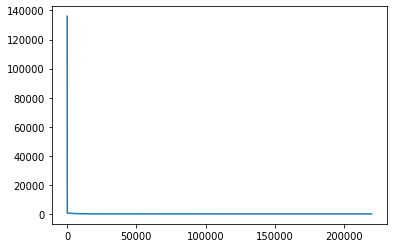

In [23]:
plt.plot(J_tr)
plt.show()

#03. Testing data error

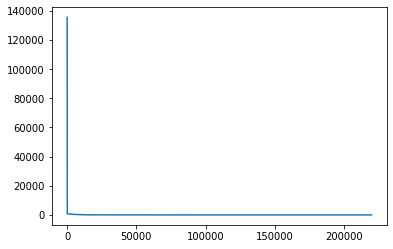

In [24]:
plt.plot(J_ts)
plt.show()

* PS : 어느정도 안정화 됐을 때의 initial값을 제외한 Training error값

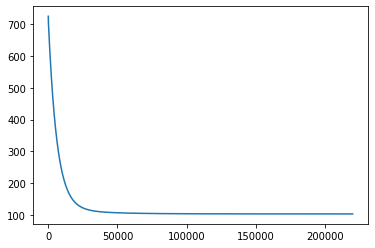

In [25]:
i = 0
while i < 50:
  del J_tr[0]  
  i += 1
  
plt.plot(J_tr)
plt.show()

* PS2 : 어느정도 안정화 됐을 때의 initial값을 제외한 Testing error값
(꿀렁이는 값은 그래프로는 보이지 않음)

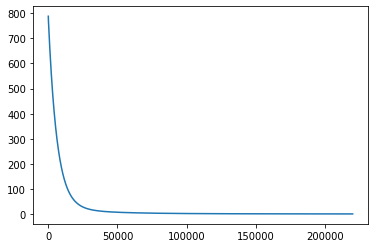

In [26]:
i = 0
while i < 50:
  del J_ts[0]  
  i += 1
plt.plot(J_ts)
plt.show()

##* sklearn을 이용한 $\theta$ 값 들(Train data의 coefficient들) 구하기

0.9970088421985289
[ 0.          0.79285367 -1.7943636   4.00796887]
103.4538494642124


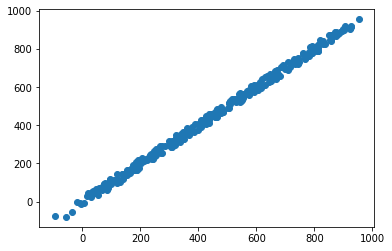

In [27]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(train_data, train_h) 
print(mlr.score(train_data, train_h))

print(mlr.coef_)

y_predicted = mlr.predict(train_data)
print(((train_h - y_predicted)**2).mean() /  2)
plt.scatter(train_h, y_predicted)
plt.show()

위에서 도출해낸 $\theta$와 coefficient, error와 cost와의 차이가 거의 나지 않기 때문에 위에서 도출해낸 converge 값이 적절하다고 판단할 수 있다.